In [1]:
import os
import scipy
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
from PIL import Image as img

In [2]:
print(os.listdir('.'))
print(os.path.isfile('./forces_xyz_raw.mat'))  # Should return True if file exists


['signals_4_modality.mat', 'labels.csv', '.DS_Store', 'chips', '.ipynb_checkpoints', 'spectrograms_outof_mat.ipynb', 'tool']
True


In [3]:
# Define the base directory path
base_dir = "./data"

# Create the main 'data' directory
os.makedirs(base_dir, exist_ok=True)

# Create the 'spec' directory inside 'data'
spec_dir = os.path.join(base_dir, "spec")
os.makedirs(spec_dir, exist_ok=True)

# Create subdirectories under 'spec'
subdirectories = ["x", "y", "z"]

# Create subdirectories and additional folders under each subdirectory
for subdirectory in subdirectories:
    sub_dir_path = os.path.join(spec_dir, subdirectory)
    os.makedirs(sub_dir_path, exist_ok=True)

    additional_folders = ["sharp", "used", "dulled"]
    for folder in additional_folders:
        folder_path = os.path.join(sub_dir_path, folder)
        os.makedirs(folder_path, exist_ok=True)

print("Folder structure created successfully.")


Folder structure created successfully.


In [4]:
mat = scipy.io.loadmat('./forces_xyz_raw.mat')

In [5]:
x = mat["baseDatastore"][0][3][0]
x.size

97719

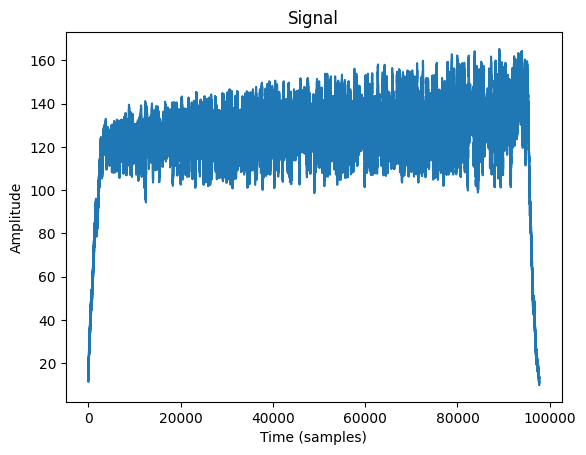

In [6]:
plt.plot(x);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

In [7]:
hi = 256 # Height of image
wi = 256 # Width of image
sr = 100
ps = librosa.feature.melspectrogram(y=x, sr=sr)

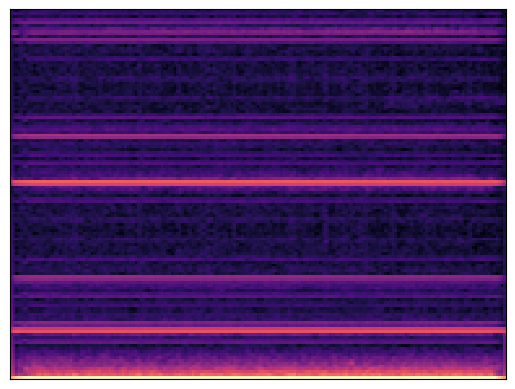

In [8]:
plt.cla()
ps_db= librosa.power_to_db(ps, ref=np.max)
spectrogram = librosa.display.specshow(ps_db, sr=sr, x_axis=None, y_axis=None)
spectrogram

In [9]:
def spec_dataset_design(dataset_signals, dataset_labels, axes_of_signal):
    sr = 10000
    area = (11, 10, 506, 379)
    if axes_of_signal == 'x':
        counter = 0
        plt.cla()
        for i in dataset_signals["baseDatastore"]:
            x = i[3][0]
            ps = librosa.feature.melspectrogram(y=x, sr=sr)
            ps_db= librosa.power_to_db(ps, ref=np.max)
            spectrogram = librosa.display.specshow(ps_db, sr=sr, x_axis=None, y_axis=None)
            if dataset_labels["baseDatastore"][counter][2][0] == '1':
                spectrogram.figure.savefig('./data/spec/x/sharp/' + str(mat['baseDatastore'][counter][0][0]), bbox_inches='tight')
                cropped_img = img.open('./data/spec/x/sharp/' + str(mat['baseDatastore'][counter][0][0]))
                cropped_img = cropped_img.crop(area)
                cropped_img.save('./data/spec/x/sharp/' + str(mat['baseDatastore'][counter][0][0]))
            elif dataset_labels["baseDatastore"][counter][2][0] == '2':
                spectrogram.figure.savefig('./data/spec/x/used/' + str(mat['baseDatastore'][counter][0][0]), bbox_inches='tight')
                cropped_img = img.open('./data/spec/x/used/' + str(mat['baseDatastore'][counter][0][0]))
                cropped_img = cropped_img.crop(area)
                cropped_img.save('./data/spec/x/used/' + str(mat['baseDatastore'][counter][0][0]))
            elif dataset_labels["baseDatastore"][counter][2][0] == '3':
                spectrogram.figure.savefig('./data/spec/x/dulled/' + str(mat['baseDatastore'][counter][0][0]), bbox_inches='tight')
                cropped_img = img.open('./data/spec/x/dulled/' + str(mat['baseDatastore'][counter][0][0]))
                cropped_img = cropped_img.crop(area)
                cropped_img.save('./data/spec/x/dulled/' + str(mat['baseDatastore'][counter][0][0]))
            counter+=1
            del x, ps, ps_db, spectrogram
            plt.cla()
    elif axes_of_signal == 'y':
        counter = 0
        plt.cla()
        for i in dataset_signals["baseDatastore"]:
                x = i[3][1]
                ps = librosa.feature.melspectrogram(y=x, sr=sr)
                ps_db= librosa.power_to_db(ps, ref=np.max)
                spectrogram = librosa.display.specshow(ps_db, sr=sr, x_axis=None, y_axis=None)
                if dataset_labels["baseDatastore"][counter][2][0] == '1':
                    spectrogram.figure.savefig('./data/spec/y/sharp/' + str(mat['baseDatastore'][counter][0][0]), bbox_inches='tight')
                    cropped_img = img.open('./data/spec/y/sharp/' + str(mat['baseDatastore'][counter][0][0]))
                    cropped_img = cropped_img.crop(area)
                    cropped_img.save('./data/spec/y/sharp/' + str(mat['baseDatastore'][counter][0][0]))
                elif dataset_labels["baseDatastore"][counter][2][0] == '2':
                    spectrogram.figure.savefig('./data/spec/y/used/' + str(mat['baseDatastore'][counter][0][0]), bbox_inches='tight')
                    cropped_img = img.open('./data/spec/y/used/' + str(mat['baseDatastore'][counter][0][0]))
                    cropped_img = cropped_img.crop(area)
                    cropped_img.save('./data/spec/y/used/' + str(mat['baseDatastore'][counter][0][0]))
                elif dataset_labels["baseDatastore"][counter][2][0] == '3':
                    spectrogram.figure.savefig('./data/spec/y/dulled/' + str(mat['baseDatastore'][counter][0][0]), bbox_inches='tight')
                    cropped_img = img.open('./data/spec/y/dulled/' + str(mat['baseDatastore'][counter][0][0]))
                    cropped_img = cropped_img.crop(area)
                    cropped_img.save('./data/spec/y/dulled/' + str(mat['baseDatastore'][counter][0][0]))
                counter+=1
                del x, ps, ps_db, spectrogram
                plt.cla()
    elif axes_of_signal == 'z':
        counter = 0
        plt.cla()
        for i in dataset_signals["baseDatastore"]:
                x = i[3][2]
                ps = librosa.feature.melspectrogram(y=x, sr=sr)
                ps_db= librosa.power_to_db(ps, ref=np.max)
                spectrogram = librosa.display.specshow(ps_db, sr=sr,  x_axis=None, y_axis=None)
                if dataset_labels["baseDatastore"][counter][2][0] == '1':
                    spectrogram.figure.savefig('./data/spec/z/sharp/' + str(mat['baseDatastore'][counter][0][0]), bbox_inches='tight')
                    cropped_img = img.open('./data/spec/z/sharp/' + str(mat['baseDatastore'][counter][0][0]))
                    cropped_img = cropped_img.crop(area)
                    cropped_img.save('./data/spec/z/sharp/' + str(mat['baseDatastore'][counter][0][0]))
                elif dataset_labels["baseDatastore"][counter][2][0] == '2':
                    spectrogram.figure.savefig('./data/spec/z/used/' + str(mat['baseDatastore'][counter][0][0]), bbox_inches='tight')
                    cropped_img = img.open('./data/spec/z/used/' + str(mat['baseDatastore'][counter][0][0]))
                    cropped_img = cropped_img.crop(area)
                    cropped_img.save('./data/spec/z/used/' + str(mat['baseDatastore'][counter][0][0]))
                elif dataset_labels["baseDatastore"][counter][2][0] == '3':
                    spectrogram.figure.savefig('./data/spec/z/dulled/' + str(mat['baseDatastore'][counter][0][0]), bbox_inches='tight')
                    cropped_img = img.open('./data/spec/z/dulled/' + str(mat['baseDatastore'][counter][0][0]))
                    cropped_img = cropped_img.crop(area)
                    cropped_img.save('./data/spec/z/dulled/' + str(mat['baseDatastore'][counter][0][0]))
                counter+=1
                del x, ps, ps_db, spectrogram
                plt.cla()
    else:
        print("Error, choose right axes")

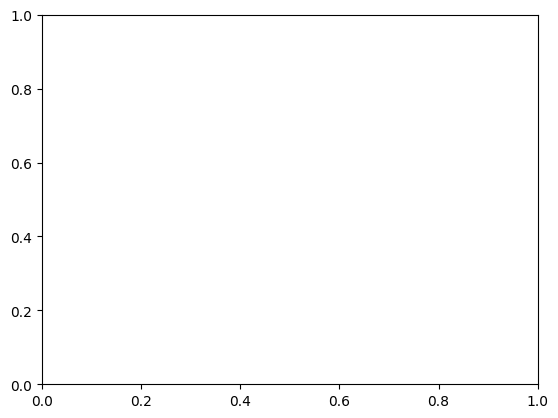

In [10]:
spec_dataset_design(mat, mat, 'x')

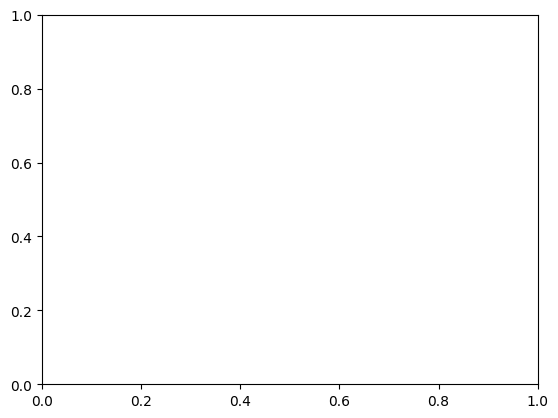

In [11]:
spec_dataset_design(mat, mat, 'y')

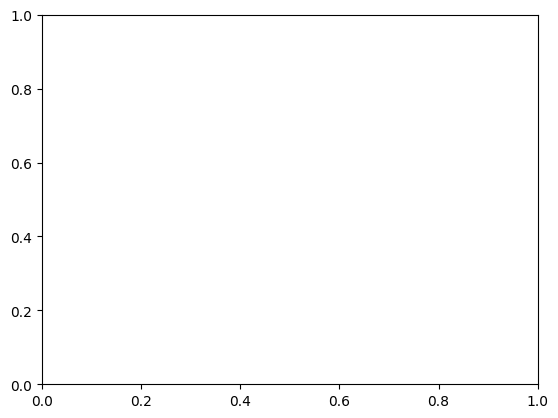

In [12]:
spec_dataset_design(mat, mat, 'z')